# Exploratory Data Analysis (EDA) Solar Prediction Project

This notebook performs exploratory data analysis on solar radiation data collected
from Benin, Sierra Leone, and Togo. The goal is to understand data quality,
identify important patterns, and prepare insights for modeling Global Horizontal Irradiance (GHI).

## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

plt.style.use('ggplot')


## 2.Load Dataset,concacnet and save

In [2]:
benin = pd.read_csv(r'D:\Projects\Baacumen\Solar-Radiation-Prediction\data\benin-malanville.csv')
sierra = pd.read_csv(r'D:\Projects\Baacumen\Solar-Radiation-Prediction\data\sierraleone-bumbuna.csv')
togo = pd.read_csv(r'D:\Projects\Baacumen\Solar-Radiation-Prediction\data\togo-dapaong_qc.csv')
benin.head(), sierra.head(), togo.head()


(          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
 0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
 1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
 2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
 3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
 4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
 
    WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
 0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
 1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
 2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
 3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
 4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   
 
    Comments  
 0       NaN  
 1       NaN  
 2       NaN  
 3       NaN  
 4       NaN  ,

In [3]:
# Add a “country” column to each dataset
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'


In [4]:
# Combine datasets into one and save 
df = pd.concat([benin, sierra, togo], ignore_index=True)
df.head()

df.to_csv('../data/solar_data.csv', index=False)



## 3.Basic Information

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null  float64
 17  TModB   

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,0.0
mean,2.243573e+02,1.449408e+02,1.151746e+02,2.231257e+02,2.155223e+02,2.741696e+01,6.298333e+01,1.878440e+00,2.576763e+00,4.649840e-01,1.494072e+02,8.771398e+00,9.899963e+02,8.079655e-04,2.697615e-03,3.339823e+01,3.286939e+01,NaN
std,3.181073e+02,2.453781e+02,1.580602e+02,3.154732e+02,3.049439e+02,5.131024e+00,2.854366e+01,1.536357e+00,1.961275e+00,2.904002e-01,1.039399e+02,6.790689e+00,1.046797e+01,2.841326e-02,3.803610e-02,1.290953e+01,1.238889e+01,NaN
min,-1.950000e+01,-7.800000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.370000e+01,3.860000e+01,6.000000e-01,1.100000e+00,4.000000e-01,5.330000e+01,2.900000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.370000e+01,NaN
50%,1.200000e+00,0.000000e+00,1.400000e+00,4.100000e+00,4.000000e+00,2.680000e+01,6.900000e+01,1.800000e+00,2.400000e+00,5.000000e-01,1.803000e+02,9.000000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.830000e+01,2.800000e+01,NaN
75%,4.244000e+02,2.270000e+02,2.190000e+02,4.111000e+02,3.973000e+02,3.100000e+01,8.860000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.342000e+02,1.290000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.260000e+01,4.190000e+01,NaN
max,1.499000e+03,1.004500e+03,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.500000e+00,8.100000e+01,9.460000e+01,NaN


## 4.Missing Values Analysis

In [6]:
df = df.drop(columns=['Comments'])

df.isna().sum()


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Country          0
dtype: int64

## 5.Summary Statistics

In [7]:
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,1576800.0,224.357336,318.107274,-19.5,-2.2,1.2,424.4,1499.0
DNI,1576800.0,144.940774,245.378143,-7.8,-0.2,0.0,227.0,1004.5
DHI,1576800.0,115.174628,158.060218,-17.9,-1.4,1.4,219.0,892.0
ModA,1576800.0,223.125655,315.473164,0.0,0.0,4.1,411.1,1507.0
ModB,1576800.0,215.522285,304.943853,0.0,0.0,4.0,397.3,1473.0
Tamb,1576800.0,27.416955,5.131024,11.0,23.7,26.8,31.0,43.8
RH,1576800.0,62.983329,28.543656,2.1,38.6,69.0,88.6,100.0
WS,1576800.0,1.878440,1.536357,0.0,0.6,1.8,2.8,19.5
WSgust,1576800.0,2.576763,1.961275,0.0,1.1,2.4,3.6,26.6
WSstdev,1576800.0,0.464984,0.290400,0.0,0.4,0.5,0.6,4.7


## 6. Outlier Detection

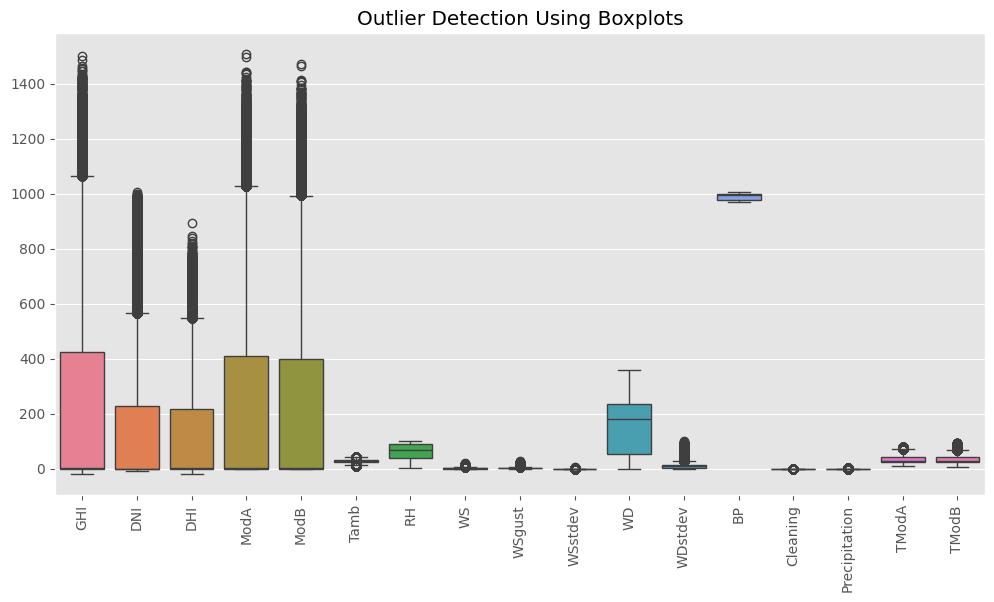

In [8]:
#Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplots")
plt.show()

In [9]:
#Isolation Forest

numeric_df = df.select_dtypes(include=['float64','int64'])

iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(numeric_df)

df['Outlier'] = outliers
df = df[df['Outlier'] == 1]  # Keep only normal data
 

df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,Outlier
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin,1
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin,1
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin,1
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin,1
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin,1


## 7. Time-Series Analysis

In [10]:
# Convert Timestamp and Sort
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

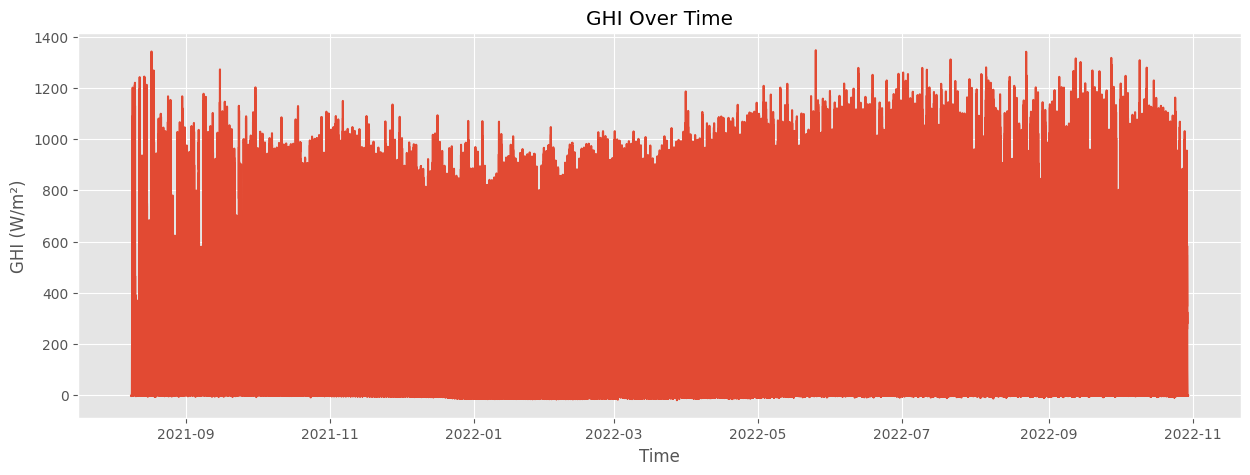

In [11]:
#Trend Plot
plt.figure(figsize=(15,5))
plt.plot(df['Timestamp'], df['GHI'])
plt.title("GHI Over Time")
plt.xlabel("Time")
plt.ylabel("GHI (W/m²)")
plt.show()

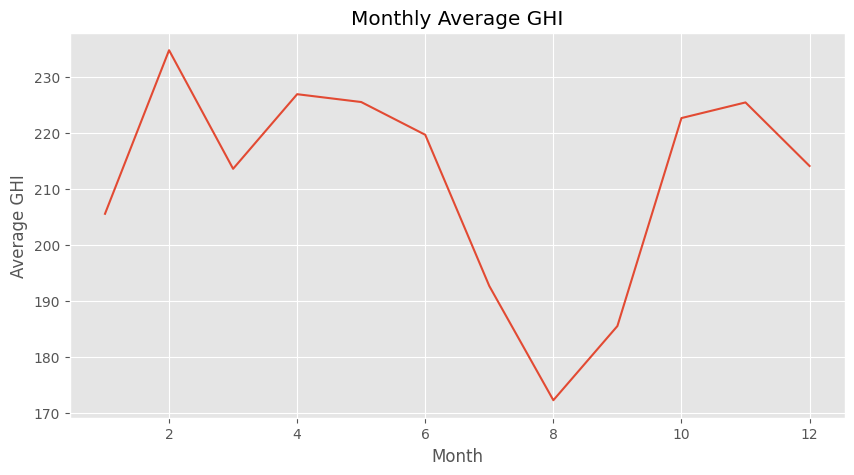

In [12]:
#Monthly Trends
df['Month'] = df['Timestamp'].dt.month

df.groupby('Month')['GHI'].mean().plot(kind='line', figsize=(10,5))
plt.title("Monthly Average GHI")
plt.ylabel("Average GHI")
plt.show()

## 8. Correlation Analysis

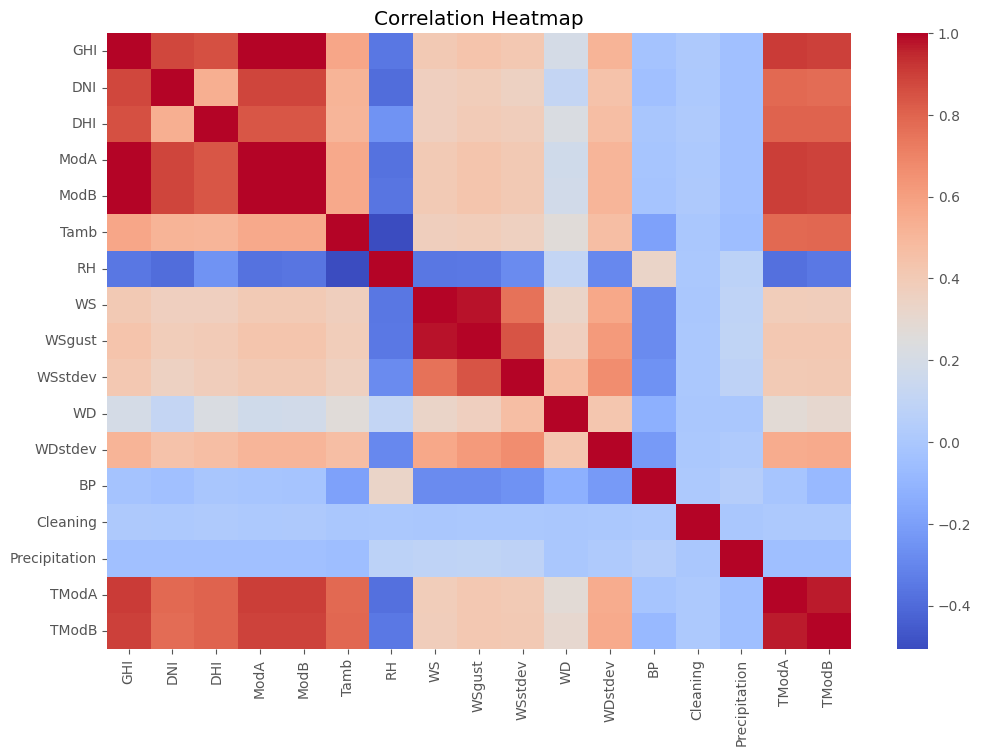

In [13]:
#Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

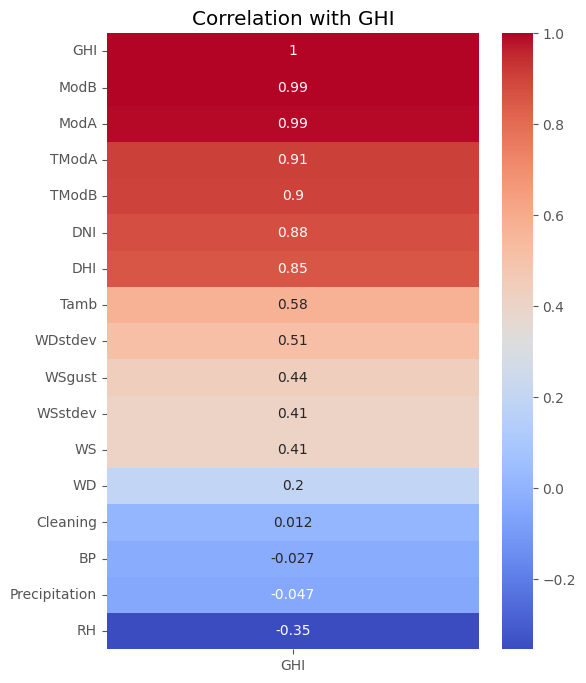

In [14]:
#Correlation with GHI Only
plt.figure(figsize=(6,8))
sns.heatmap(numeric_df.corr()[['GHI']].sort_values(by='GHI', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation with GHI")
plt.show()

## 9. Distribution Analysis

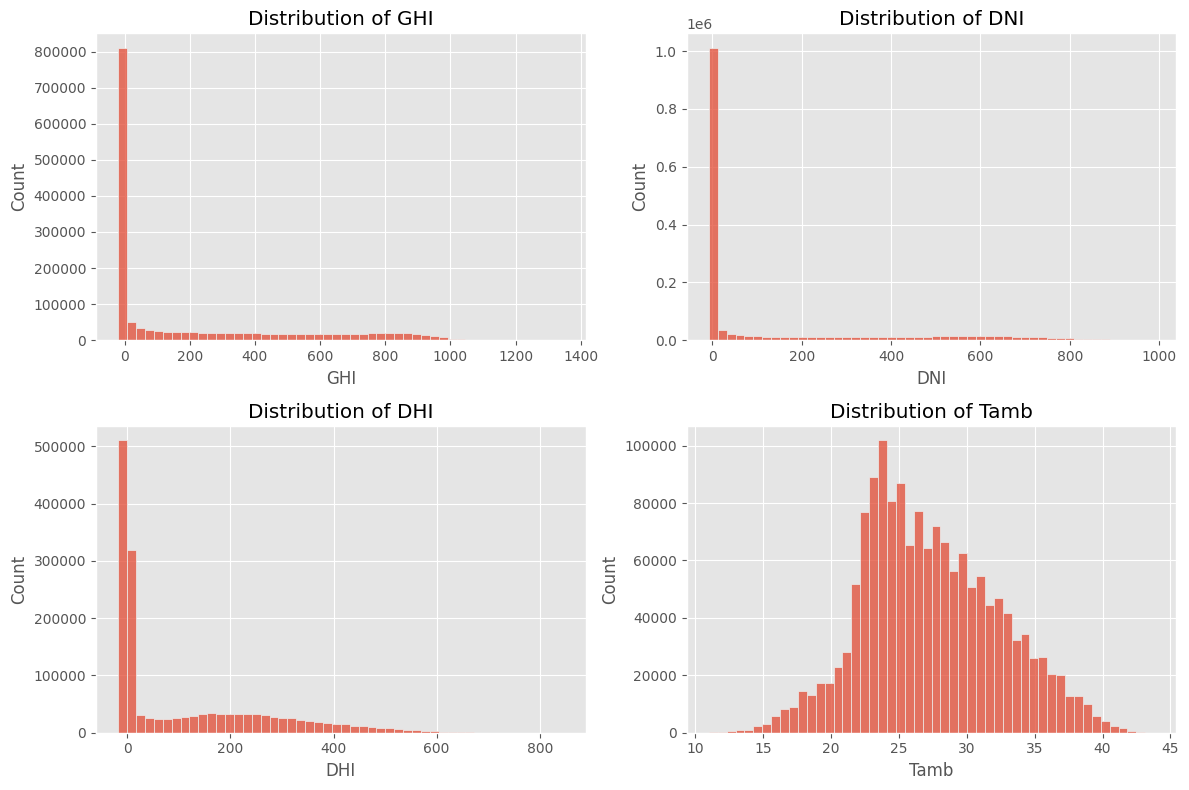

In [15]:
cols = ['GHI', 'DNI', 'DHI', 'Tamb']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], bins=50)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## 10. Feature Relationship Plots

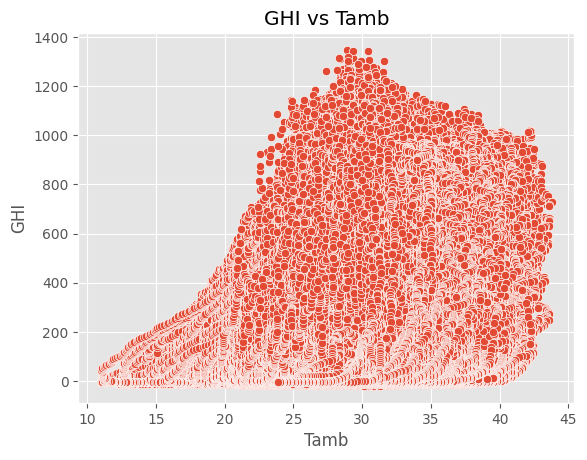

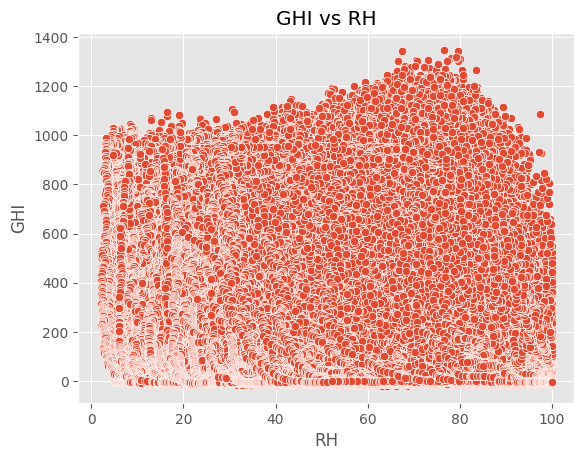

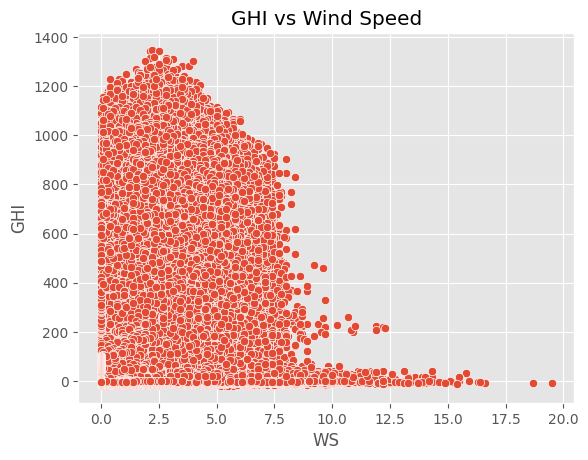

In [16]:
sns.scatterplot(data=df, x='Tamb', y='GHI')
plt.title("GHI vs Tamb")
plt.show()

sns.scatterplot(data=df, x='RH', y='GHI')
plt.title("GHI vs RH")
plt.show()

sns.scatterplot(data=df, x='WS', y='GHI')
plt.title("GHI vs Wind Speed")
plt.show()


## 11.Pairplot

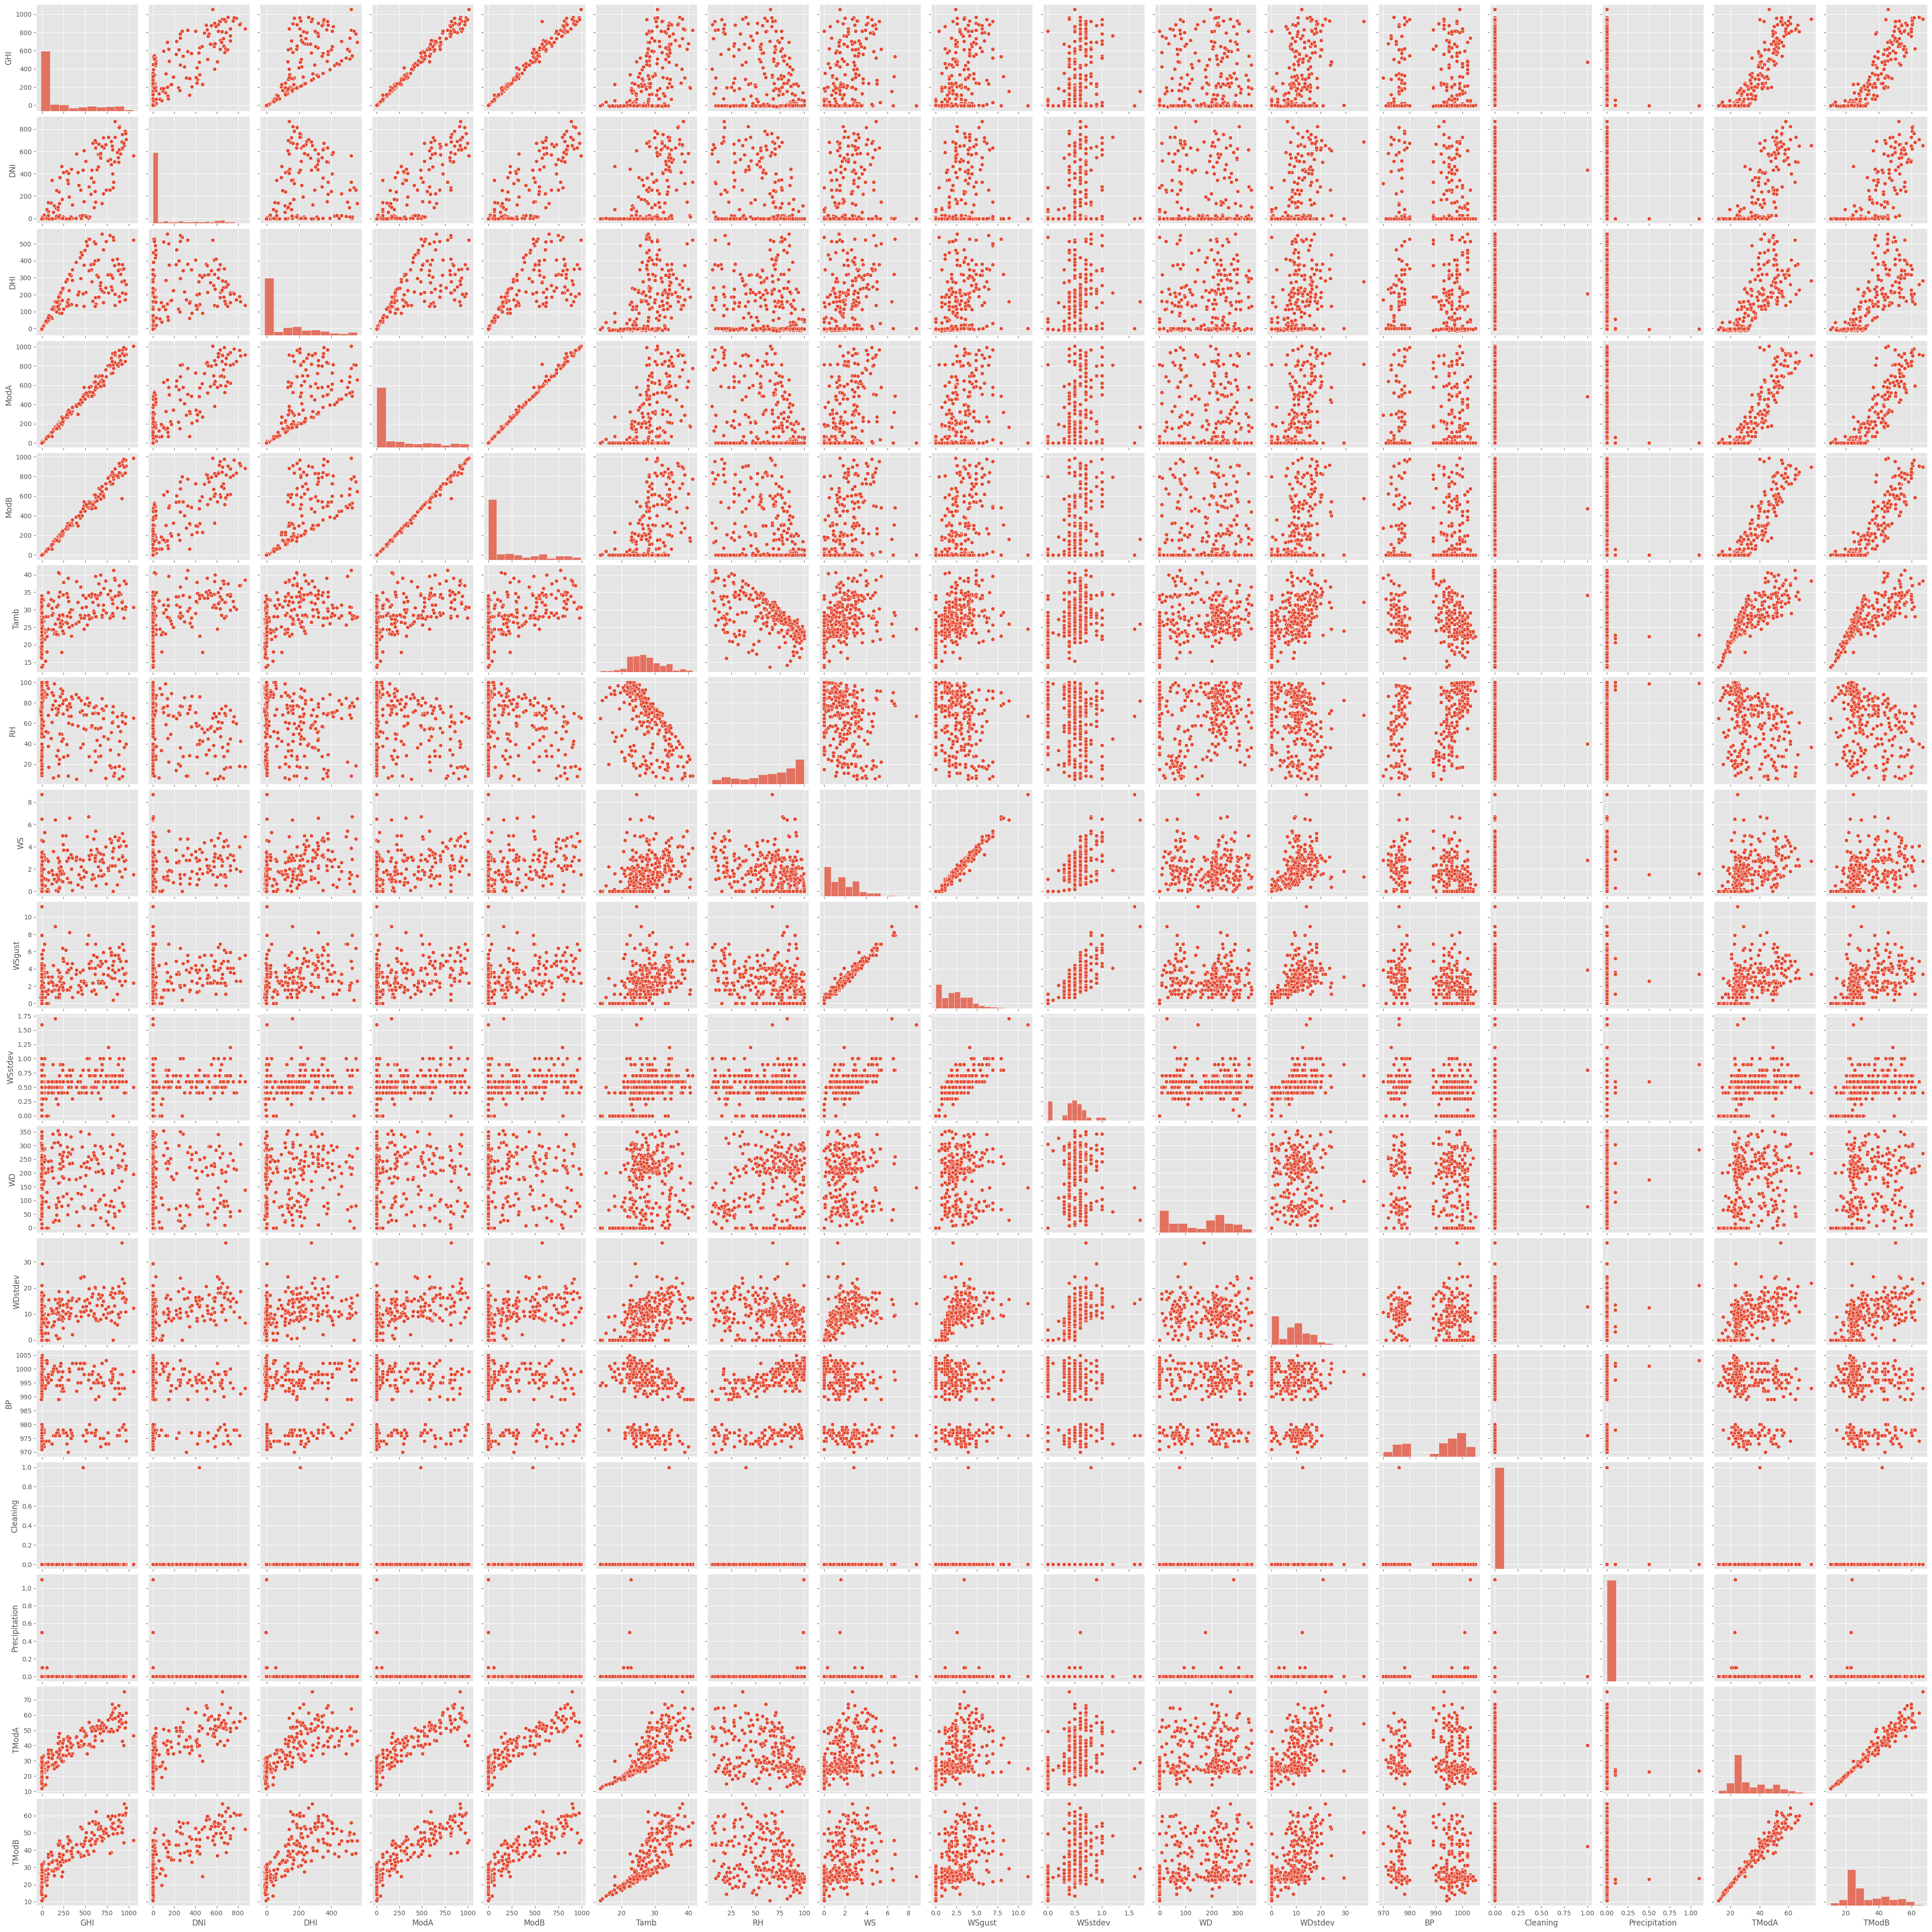

In [17]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

sample_df = df[numeric_cols].sample(min(300, len(df)))
sns.pairplot(sample_df)
plt.show()
